# INSTAGRAM FAKE ACCOUNTS

## Problem Statement:

Fake accounts create a big problem for social media platforms. Analyze this data set to suggest how Instagram could detect fake accounts and block them.

## Goals:
  * To find out the best features from the dataset.
  * To classify the into clusters.
  * To find out which classification method works best.

In [2]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Data files for this problem is train and test datasets. 
Fake attribute in the dataset have 0 and 1. If the value is 0 then it is not fake account otherwise account is fake.
So, I divided the data of train into dataset and fake.

In [3]:
dataset = pd.read_csv("train.csv",usecols=['profile pic', 'nums/length username', 'fullname words',
       'nums/length fullname', 'name==username', 'description length',
       'external URL', 'private', '#posts', '#followers', '#follows'])
fake=pd.read_csv("train.csv",usecols=['fake'])

In [4]:
test = pd.read_csv("test.csv",usecols=['profile pic', 'nums/length username',
       'nums/length fullname', 'name==username',
       'external URL'])
test_fake=pd.read_csv("test.csv",usecols=['fake'])

Understanding the data is the most important step before doing any processing. So, let's understand the data by visualising using matplotlib and seaborn.

In [5]:
import warnings
warnings.filterwarnings('ignore')

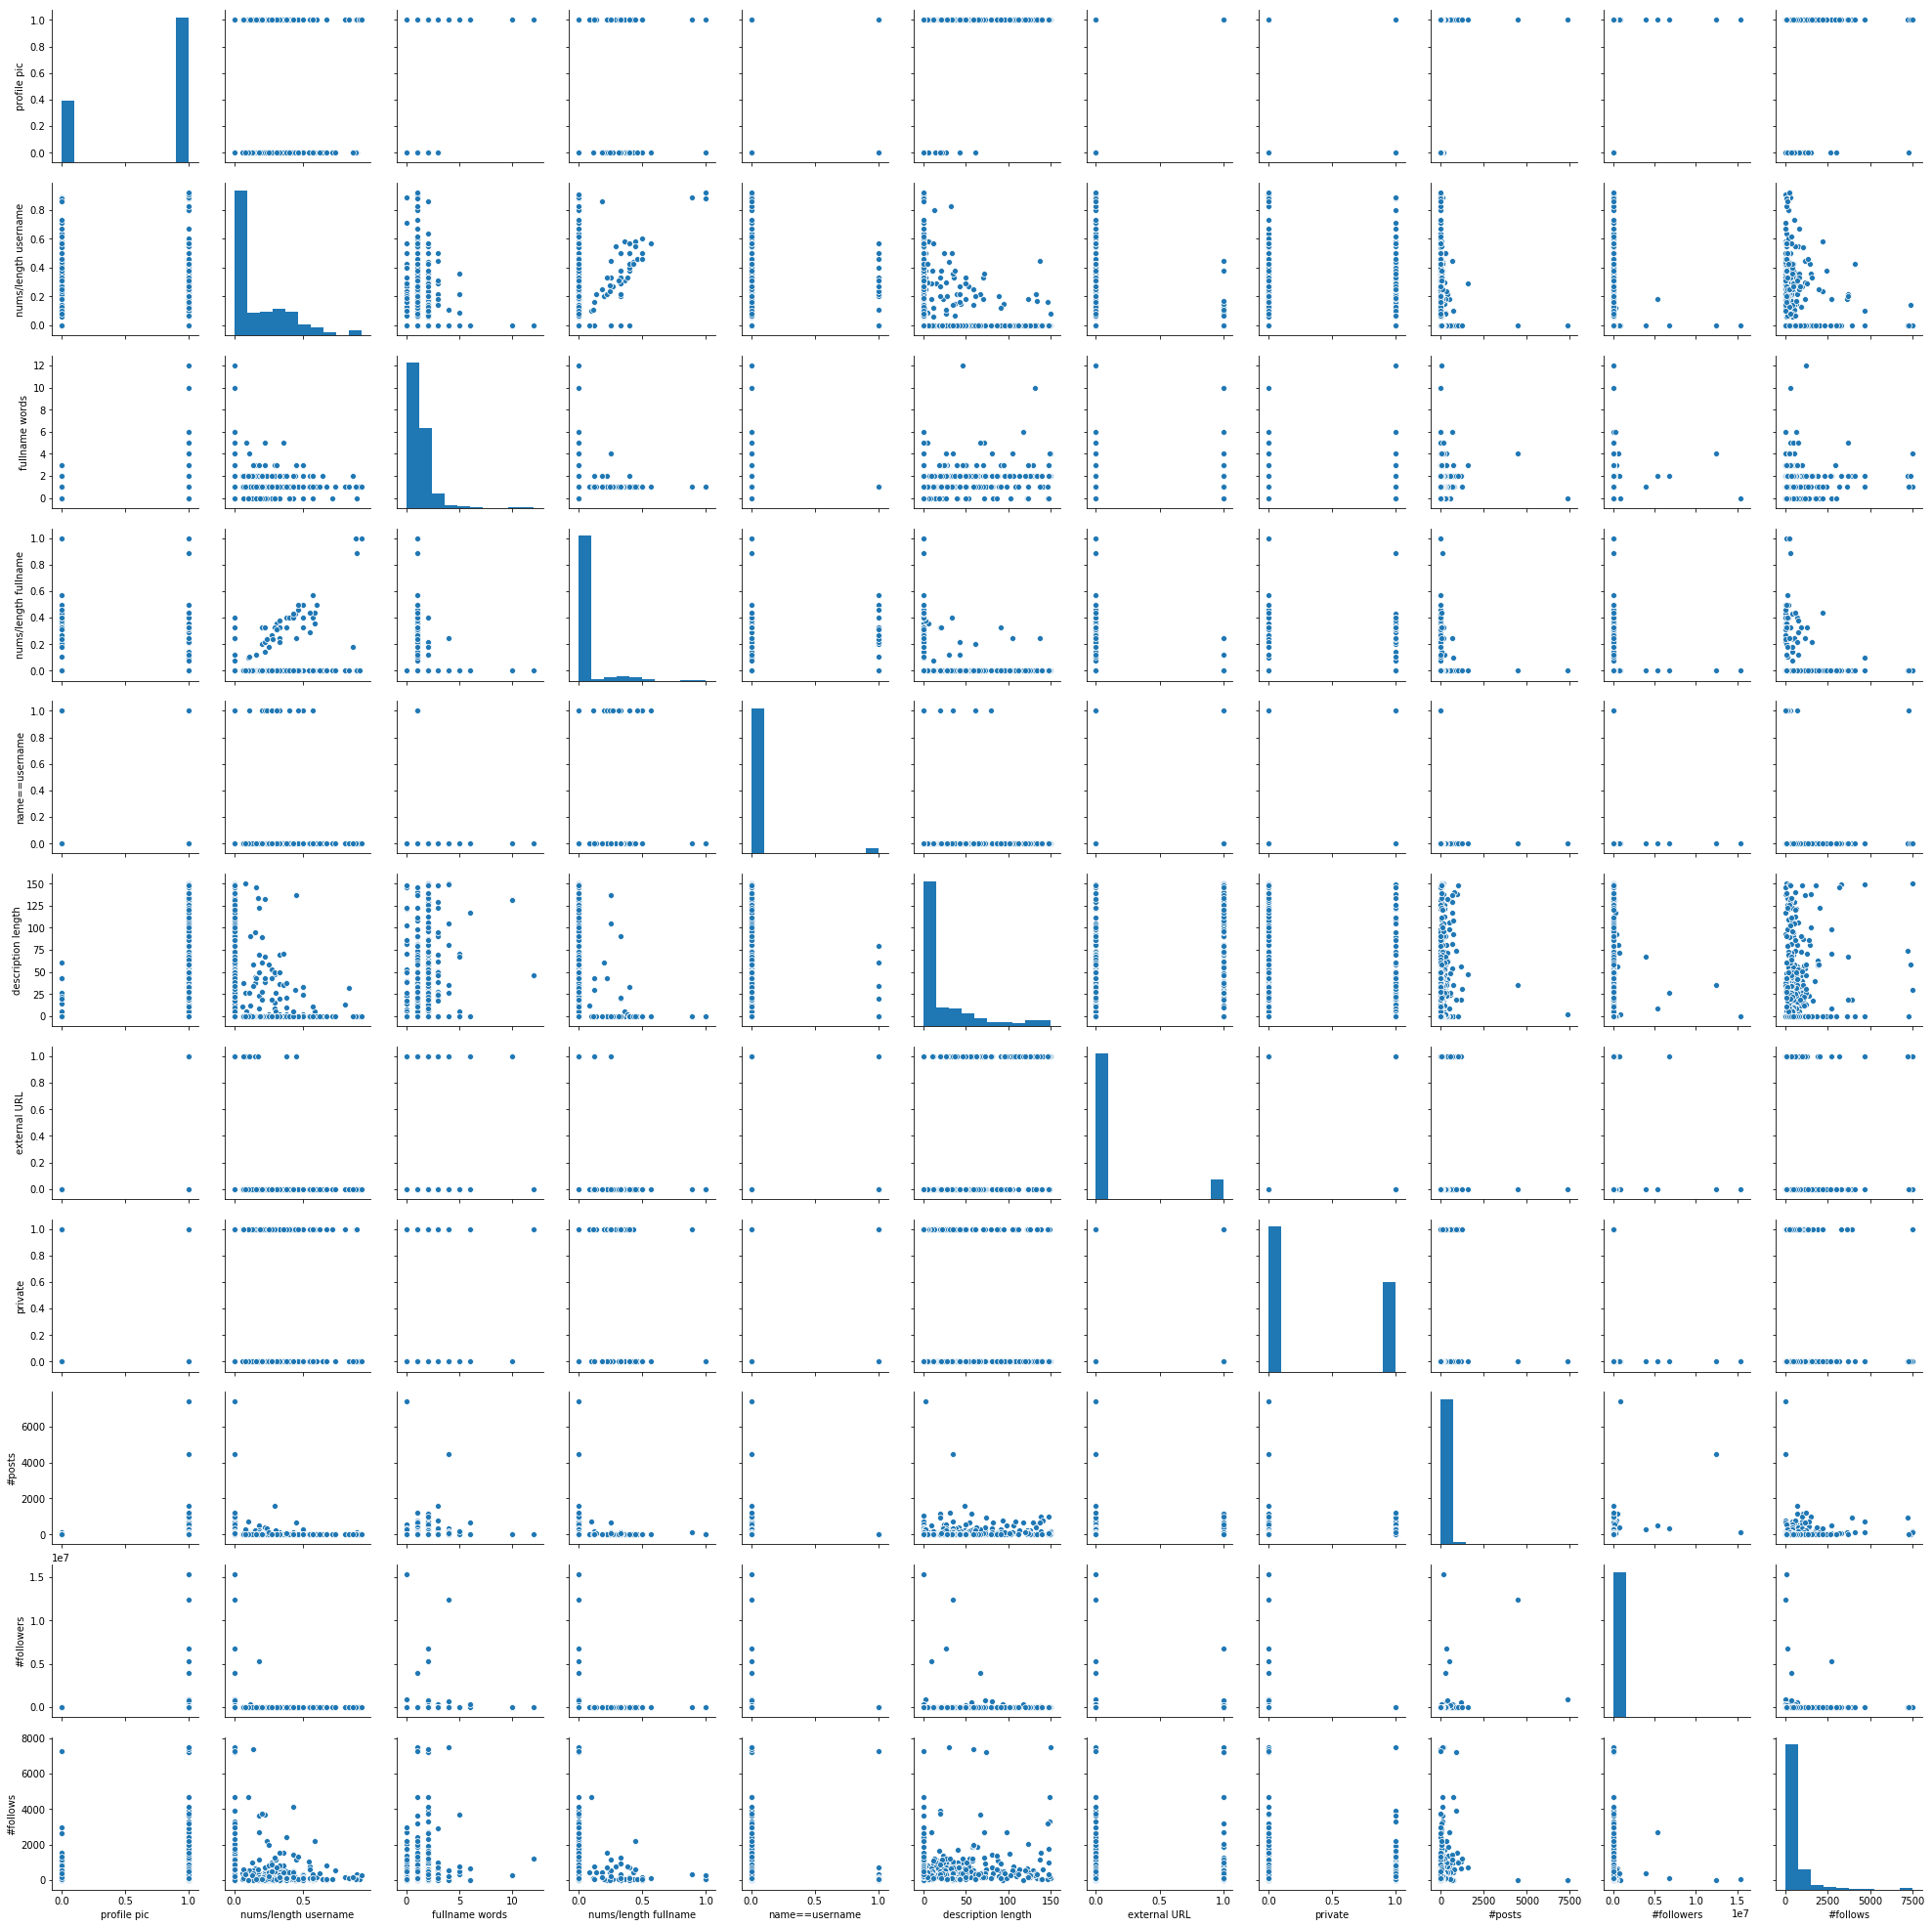

In [6]:
sns.pairplot(dataset)
plt.show()

Visualising Correlation matrix amongst all variables using heatmap

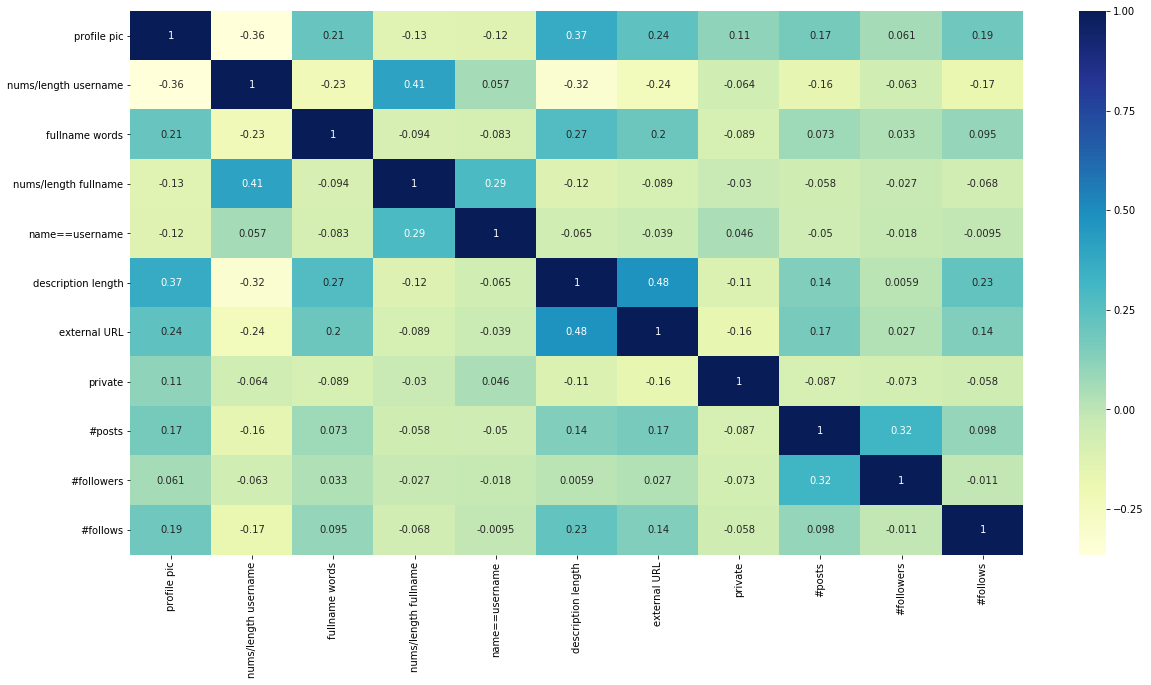

In [7]:
plt.figure(figsize=(20,10))
correlation = dataset.corr()
sns.heatmap(correlation, 
            annot= True, 
            cmap = "YlGnBu")
plt.show()

In [56]:
svm = LinearSVC()
recurFS = RFE(svm, 5)#used Recursive Feature Elimination for the feature selection
recurFS = recurFS.fit(dataset,np.ravel(fake,order='C'))
print(type(dataset))
print(type(fake))
print(recurFS.support_)#gives the result of attributes that are used to find the fake accounts
print(recurFS.ranking_)#gives the rank for the attributes

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
[ True  True False  True  True False  True False False False False]
[1 1 2 1 1 5 1 3 4 6 7]


Above Recursive Feature Elimination method is used for finding the features.
Output contains the ranking and the support attributes that are needed to find fake accounts.


In [57]:
fake=np.array(fake)
dataset=np.array(dataset)
test=np.array(test)

In [73]:
features=pd.read_csv("train.csv",usecols=['profile pic', 'nums/length username',
       'nums/length fullname', 'name==username',
       'external URL'])
k_features=pd.read_csv("train.csv",usecols=['profile pic', 'nums/length username','nums/length fullname', 'name==username','external URL'])

In [74]:
from sklearn.cluster import KMeans
%matplotlib inline

In [75]:
kmeans = KMeans(n_clusters=2)#Used kmeans clustering algorithm to create clusters
kmeans.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [76]:
label = kmeans.labels_

In [77]:
label.size

576

In [78]:
features["CLUSTERS"] = list(label)

In [79]:
features["CLUSTERS"].value_counts()

0    404
1    172
Name: CLUSTERS, dtype: int64

In [80]:
features=pd.read_csv("train.csv",usecols=['profile pic', 'nums/length username',
       'nums/length fullname', 'name==username',
       'external URL'])
k_features=pd.read_csv("train.csv",usecols=['profile pic', 'nums/length username','nums/length fullname', 'name==username','external URL'])

Classifier1:LogisticRegression
* used logistic Regression to predict the fake accounts.
* Then training data is fitted in the model.
* We use test data to predict the fake accounts.
* Accuracy factor is found according to predicted data.

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression(solver='lbfgs') #To avoid any FutrureWarings we use solver
lr.fit(features,np.ravel(fake,order='C'))#To avoid DataConversionWarings ravel function can be used
lr_pred=lr.predict(test)
accuracy =  accuracy_score(test_fake, lr_pred) * 100

In [82]:
print(test_fake)
print("The predicted values are:")
print(lr_pred)
print("The accuracy of the Predicted values is:",accuracy)

     fake
0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
..    ...
90      1
91      1
92      1
93      1
94      1
95      1
96      1
97      1
98      1
99      1
100     1
101     1
102     1
103     1
104     1
105     1
106     1
107     1
108     1
109     1
110     1
111     1
112     1
113     1
114     1
115     1
116     1
117     1
118     1
119     1

[120 rows x 1 columns]
The predicted values are:
[1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 0 1 1]
The accuracy of the Predicted values is: 87.5


From the above result we can see that some accounts which are not fake are predicted as fake and some fake accounts are predicted as not fake. 

Classifies 2: Naive Bayes

In [83]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(features,np.ravel(fake,order='C'))
Gaussian_pred=nb.predict(test)
accuracy_Gua =  accuracy_score(test_fake, Gaussian_pred) * 100
print(Gaussian_pred)
print("The accuracy using Naive Bayes is:",accuracy_Gua)

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1
 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
The accuracy using Naive Bayes is: 60.0


From the above result we can see most of the accounts are fallen into fake accounts and the accuracy is low when compared with actual data.

Classifier 3: K nearest neighbors

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(features,np.ravel(fake,order='C'))
knn_pred=knn.predict(test)
accuracy_knn =  accuracy_score(test_fake, knn_pred) * 100
print(knn_pred)
print("The accuracy of using KNN is",accuracy_knn)

[1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 0 1 1 0 1 1]
The accuracy of using KNN is 88.33333333333333


Classifier 4: SVM classifier

In [85]:
from sklearn.svm import SVC
svcc = SVC(gamma='auto') #To avoid any FutrureWarings
svcc.fit(features,np.ravel(fake,order='C'))
svc_pred=svcc.predict(test)
accuracy_svc =  accuracy_score(test_fake, svc_pred) * 100
print(svc_pred)
print("The accuracy using SVM Classifier is:",accuracy_svc)

[1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 0 1 1]
The accuracy using SVM Classifier is: 87.5


I used the Logistic Regression, Naive Bayes, K Nearest Neighbors and SVM classiers to predict the fake accounts. Among the 4 classifiers K Nearest neighbours got the highest accuracy for the test data. So, this Classification method is best when compared to other classifiers.

## Conclusion
* By using all the classifiers we are finding the fake accounts in the dataset using the given attributes.
* The predictive values which are 1 are taken as the fake accounts in the output.
* The highest acccuracy aquired by the dataset is 88.33% by using K-nearest Neighbors classifiers.